# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [40]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [41]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [42]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,243
Treatment,155


col_0,Frequency
status,
Control,0.610553
Treatment,0.389447


<font size = "5">

Query with string conditions

In [43]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [44]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,24.181935,5.393548,187.793548,2903.780645,15.525806
std,8.177499,1.707496,104.631989,850.157909,2.740932
min,9.000000,3.000000,70.000000,1760.000000,8.000000
25%,17.800000,4.000000,98.000000,2197.000000,13.650000
50%,23.900000,4.000000,140.000000,2639.000000,15.500000
75%,29.850000,7.000000,260.000000,3589.500000,17.200000
max,46.600000,8.000000,455.000000,4952.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,243.000000,243.000000,243.000000,243.000000,243.000000
mean,23.088889,5.493827,197.020576,3012.934156,15.595062
std,7.562768,1.699223,104.092713,843.720345,2.773632
min,10.000000,3.000000,68.000000,1613.000000,8.500000
25%,17.000000,4.000000,106.000000,2254.500000,13.950000
50%,22.000000,4.000000,151.000000,2905.000000,15.500000
75%,28.000000,8.000000,302.000000,3612.500000,17.100000
max,44.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [45]:
def fn_compute_value(P,r,n,t):
    V = P*(1 + r/n)**(n*t)
    return(V)
V1 = fn_compute_value(P = 1000, r = 0.01, n = 20, t=10)
print(V1)

def fn_grade(numeric_grade):
    if numeric_grade >=55:
        status ="pass"
    else:
        status ="fail"
    return(status)

print(fn_grade(numeric_grade=58))

data  = pd.DataFrame([])
data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

## Define a Function
fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)

display(data)



1105.1432983541217
pass


,age,num_underage_siblings,num_adult_siblings,can_vote,in_twenties,age_bracket
0,18,0,1,True,False,Adult
1,29,0,0,True,True,Adult
2,15,1,0,False,False,Adolescent
3,32,1,1,True,False,Adult
4,6,0,0,False,False,Child


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [46]:
carfeatures = pd.read_csv("data_raw/features.csv")

mean_weight = carfeatures["weight"].mean()

## Query with multiple conditions
data_mean = carfeatures.query("(weight <= @mean_weight) & (cylinders == 4)")

display(data_mean)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
14,24.0,4,113,95,2372,15.0,T-1689934
18,27.0,4,97,88,2130,14.5,D-1689978
19,26.0,4,97,46,1835,20.5,V-1689989
20,25.0,4,110,87,2672,17.5,P-1690000
21,24.0,4,107,90,2430,14.5,A-1690011
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [47]:
car_ascendingmpg = carfeatures.sort_values(by = "mpg",ascending = True)
display(car_ascendingmpg.iloc[0:5,:])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
28,9.0,8,304,193,4732,18.5,H-1690088
25,10.0,8,360,215,4615,14.0,F-1690055
26,10.0,8,307,200,4376,15.0,C-1690066
103,11.0,8,400,150,4997,14.0,C-1690913
124,11.0,8,350,180,3664,11.0,O-1691144


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [48]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status, size = size_dataset, p = prop_status)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

display(data_treated.describe())
display(data_control.describe())

display(data_treated)
display(data_control)

,mpg,cylinders,displacement,weight,acceleration
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,23.819632,5.380368,189.601227,2946.650307,15.422086
std,7.838854,1.718486,105.950987,880.451698,2.684340
min,10.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.550000,4.000000,101.000000,2214.500000,14.000000
50%,23.000000,4.000000,140.000000,2670.000000,15.200000
75%,29.900000,8.000000,282.000000,3611.000000,17.000000
max,46.600000,8.000000,440.000000,4997.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,23.302979,5.506383,196.080851,2986.914894,15.669362
std,7.809803,1.690522,103.229424,824.225402,2.808655
min,9.000000,3.000000,70.000000,1649.000000,8.500000
25%,17.250000,4.000000,105.000000,2240.000000,13.550000
50%,22.000000,5.000000,156.000000,2900.000000,15.500000
75%,28.000000,8.000000,261.000000,3584.000000,17.300000
max,44.300000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
5,15.0,8,429,198,4341,10.0,F-1689835,Treatment
7,14.0,8,440,215,4312,8.5,P-1689857,Treatment
...,...,...,...,...,...,...,...,...
385,38.0,4,91,67,1995,16.2,D-1694015,Treatment
389,22.0,6,232,112,2835,14.7,F-1694059,Treatment
390,32.0,4,144,96,2665,13.9,T-1694070,Treatment
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
6,14.0,8,454,220,4354,9.0,C-1689846,Control
8,14.0,8,455,225,4425,10.0,P-1689868,Control
9,15.0,8,390,190,3850,8.5,A-1689879,Control
...,...,...,...,...,...,...,...,...
391,36.0,4,135,84,2370,13.0,D-1694081,Control
392,27.0,4,151,90,2950,17.3,C-1694092,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 1.0, '*********************')

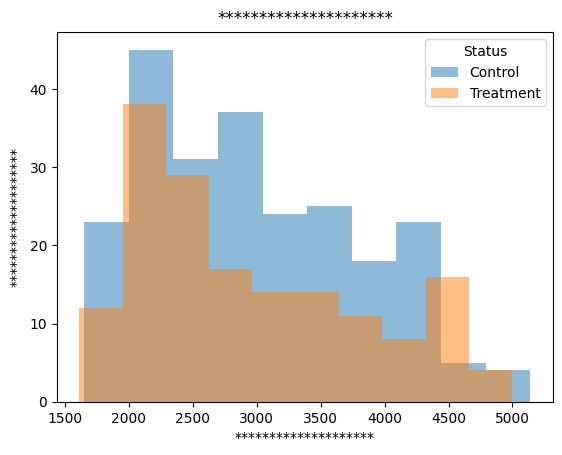

In [49]:
list_unique_status = pd.unique(carfeatures["status"])

for unique_status in list_unique_status:
    temporarydataframe = carfeatures.query("status == @unique_status")
    plt.hist(temporarydataframe["weight"], alpha=0.5)

plt.legend(labels=list_unique_status, title="Status")

plt.xlabel("********************")
plt.ylabel("********************")
plt.title("*********************")